In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

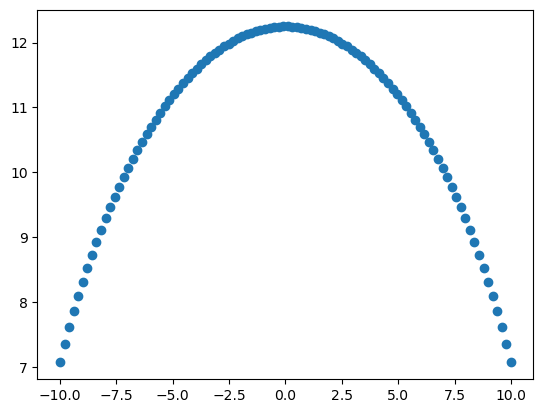

In [24]:
## creating a synthetic data

x1 = np.linspace(-10, 10, num = 100)
y1 = np.sqrt(150 - x1**2)


plt.scatter(x1, y1)
plt.show()

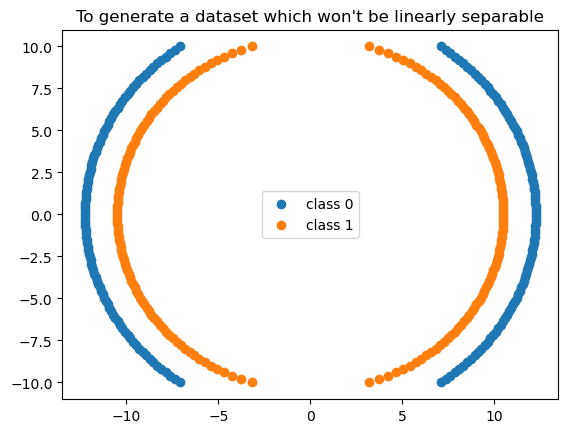

In [25]:
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

x2 = np.linspace(-10, 10, num = 100)
y2 = np.sqrt(110 - x2**2)

x2 = np.hstack([x2, -x2])
y2 = np.hstack([y2, -y2])
plt.scatter(y1, x1, label = "class 0")
plt.scatter(y2, x2,  label = "class 1")
plt.title("To generate a dataset which won't be linearly separable")
plt.legend(loc = 'center')
plt.show()

In [26]:
df1 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df1['y'] = 0
df1


,X1,X2,y
0,7.071068,-10.000000,0
1,7.348441,-9.797980,0
2,7.610359,-9.595960,0
3,7.858365,-9.393939,0
4,8.093740,-9.191919,0
...,...,...,...
195,-8.093740,-9.191919,0
196,-7.858365,-9.393939,0
197,-7.610359,-9.595960,0
198,-7.348441,-9.797980,0


In [27]:
df2 = pd.DataFrame(np.vstack([y2, x2]).T, columns= ['X1', 'X2'])
df2['y'] = 1
df2

,X1,X2,y
0,3.162278,-10.000000,1
1,3.741603,-9.797980,1
2,4.232914,-9.595960,1
3,4.664108,-9.393939,1
4,5.050606,-9.191919,1
...,...,...,...
195,-5.050606,-9.191919,1
196,-4.664108,-9.393939,1
197,-4.232914,-9.595960,1
198,-3.741603,-9.797980,1


In [28]:
df = pd.concat([df1, df2], axis = 0)
df

,X1,X2,y
0,7.071068,-10.000000,0
1,7.348441,-9.797980,0
2,7.610359,-9.595960,0
3,7.858365,-9.393939,0
4,8.093740,-9.191919,0
...,...,...,...
195,-5.050606,-9.191919,1
196,-4.664108,-9.393939,1
197,-4.232914,-9.595960,1
198,-3.741603,-9.797980,1


Text(0.5, 1.0, 'Dataset')

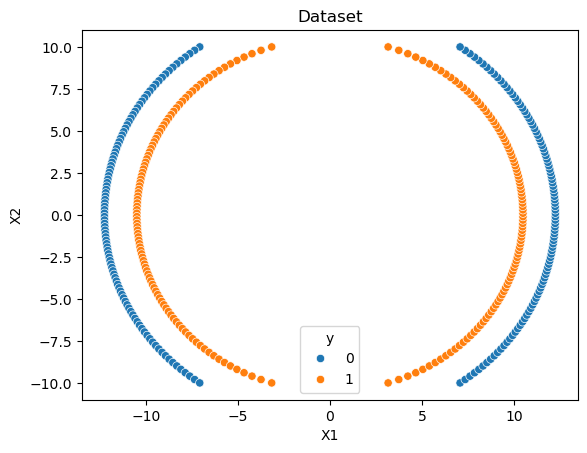

In [30]:
sns.scatterplot(data = df, x = df['X1'], y = df['X2'], hue=df['y'])
plt.title("Dataset")

Clearly we can see that it's not possible to separate classes using a line or a plane only. So we apply kernel.  What kernel will do is the kernel will transform the data from this 2d data to a 3d data which can be separated by a plane

### We apply the mechanism without using the sklearn
- We will apply the polynomial kernel with the formula
$$ K(X_1, X_2) = (X \cdot X^{T} + c)^d $$
$X = \begin{bmatrix} X_1 \\ X_2 \end{bmatrix}$ is the vector of features and $d$ is the degree of the polynomial we need.


In [32]:
df['X1**2'] = df['X1']**2
df['X2**2'] = df['X2']**2
df['X1 X2'] = df['X1']*df['X2']
df

,X1,X2,y,X1**2,X2**2,X1 X2
0,7.071068,-10.000000,0,50.000000,100.000000,-70.710678
1,7.348441,-9.797980,0,53.999592,96.000408,-71.999881
2,7.610359,-9.595960,0,57.917559,92.082441,-73.028695
3,7.858365,-9.393939,0,61.753903,88.246097,-73.821006
4,8.093740,-9.191919,0,65.508622,84.491378,-74.397001
...,...,...,...,...,...,...
195,-5.050606,-9.191919,1,25.508622,84.491378,46.424763
196,-4.664108,-9.393939,1,21.753903,88.246097,43.814347
197,-4.232914,-9.595960,1,17.917559,92.082441,40.618870
198,-3.741603,-9.797980,1,13.999592,96.000408,36.660149


In [34]:
## Now the final feature and target

X = df[['X1**2', 'X2**2', 'X1 X2']]
y = df['y']

In [35]:
X.shape, y.shape

((400, 3), (400,))

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=95)

In [37]:
xtrain.shape, ytest.shape

((280, 3), (120,))

In [40]:
import plotly.express as px

fig = px.scatter_3d(data_frame= df, x = 'X1**2', y = 'X2**2', z = 'X1 X2', color= y)
fig.show()

Now this can be this can be separated with a plane in middle
Till now we just transform the data, since we already did the transform part we can apply the simple SVC, which is with the default kernel as linear

In [41]:
from sklearn.svm import SVC
linear_svc = SVC(kernel='linear')

linear_svc.fit(xtrain, ytrain)


SVC(kernel='linear')

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
ypred = linear_svc.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest, ypred)}")

print(f"\n Confusion Matrix: \n{confusion_matrix(ytest, ypred)}")

Accuracy Score: 1.0

 Confusion Matrix: 
[[57  0]
 [ 0 63]]


### All these we could have done using the kernel = 'poly'

In [47]:
X = df[['X1', 'X2']]
y = df['y']

In [48]:
X

,X1,X2
0,7.071068,-10.000000
1,7.348441,-9.797980
2,7.610359,-9.595960
3,7.858365,-9.393939
4,8.093740,-9.191919
...,...,...
195,-5.050606,-9.191919
196,-4.664108,-9.393939
197,-4.232914,-9.595960
198,-3.741603,-9.797980


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=95)
X_train.shape, y_test.shape

((280, 2), (120,))

In [50]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"SVM with {kernel} kernel - Accuracy: {acc:.4f}")


SVM with linear kernel - Accuracy: 0.4750
SVM with poly kernel - Accuracy: 0.4667
SVM with rbf kernel - Accuracy: 1.0000
SVM with sigmoid kernel - Accuracy: 0.4917


- The poly kernel has given the accuracy 0.4 but when we applied manually it was 1. This is because the default degree in svc is 3 but we need to apply the degree 2 for the poly transformation

In [ ]:

poly_clf = SVC(kernel='poly', degree= 2)
poly_clf.fit(X_train, y_train)
y_pred2 = poly_clf.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred2))

Accuracy :  1.0


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



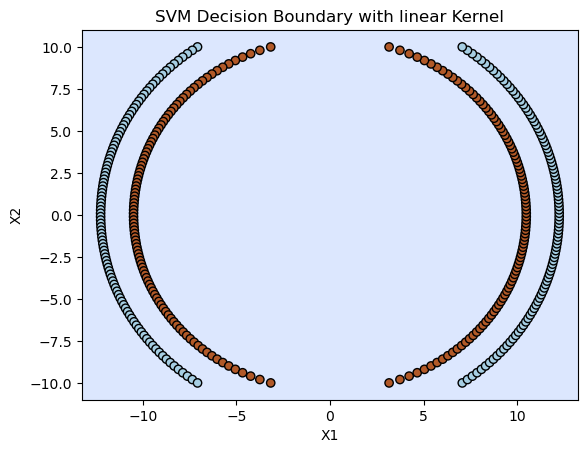

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



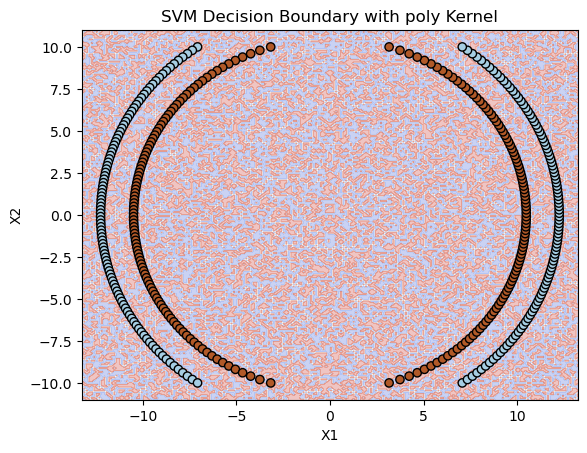

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



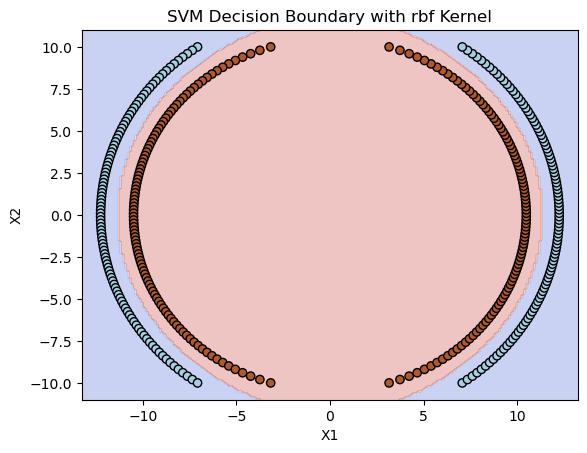

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



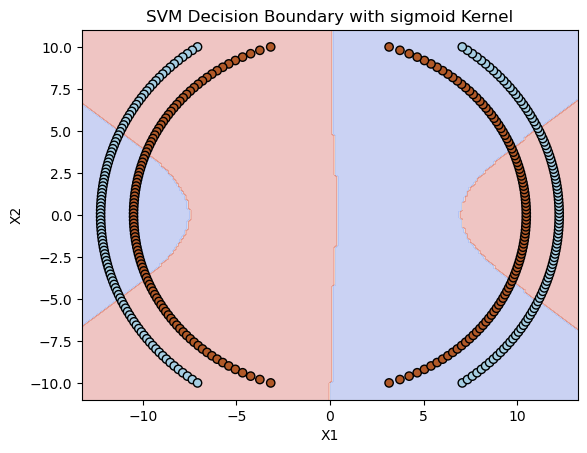

In [54]:

def plot_decision_boundary(X, y, kernel):
    """
    Plots the decision boundary for an SVM classifier with a given kernel.

    Parameters:
    X (DataFrame): Input features with columns ['X1', 'X2']
    y (Series or array): Target labels
    kernel (str): The kernel type for SVM
    """
    clf = SVC(kernel=kernel)
    clf.fit(X, y)

    x_min, x_max = X['X1'].min() - 1, X['X1'].max() + 1
    y_min, y_max = X['X2'].min() - 1, X['X2'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X['X1'], X['X2'], c=y, edgecolors='black', cmap=plt.cm.Paired)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"SVM Decision Boundary with {kernel} Kernel")
    plt.show()

# Example usage
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    plot_decision_boundary(X, y, kernel)
